In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./datasets/olympic/cost_event_athlete.csv")
df2 = pd.read_csv("./datasets/olympic/outturn_costs.csv")

In [3]:
df.head()

,Games,Year,Country,Type,"Cost per event, mio. USD","Cost per athlete, mio. USD","event,"
0,Tokyo,1964,Japan,Summer,1.7,0.1,NaN
1,Munich,1972,Germany,Summer,5.2,0.1,NaN
2,Montreal,1976,Canada,Summer,30.8,1.0,NaN
3,Moscow,1980,Soviet Union,Summer,31.2,1.2,NaN
4,Los Angeles,1984,United States,Summer,3.3,0.1,NaN


In [4]:
df2.head()

,Games,Year,Country,Type,Events,Athletes,"Cost, Billion USD"
0,Rome,1960,Italy,Summer,150,5338,NaN
1,Tokyo,1964,Japan,Summer,163,5152,0.282
2,Mexico City,1968,Mexico,Summer,172,5516,n/a**
3,Munich,1972,Germany,Summer,195,7234,1.009
4,Montreal,1976,Canada,Summer,198,6048,6.093


In [5]:
print(df.shape)
print(df2.shape)

(25, 7)
(30, 7)


In [6]:
df.dtypes

Games                          object
Year                            int64
Country                        object
Type                           object
Cost per event, mio. USD      float64
Cost per athlete, mio. USD    float64
event,                        float64
dtype: object

In [7]:
df2.dtypes

Games                object
Year                  int64
Country              object
Type                 object
Events                int64
Athletes              int64
Cost, Billion USD    object
dtype: object

In [8]:
df_merged = pd.merge(df, df2, on = ["Year", "Country"])

In [9]:
df_merged.head()

,Games_x,Year,Country,Type_x,"Cost per event, mio. USD","Cost per athlete, mio. USD","event,",Games_y,Type_y,Events,Athletes,"Cost, Billion USD"
0,Tokyo,1964,Japan,Summer,1.7,0.1,NaN,Tokyo,Summer,163,5152,0.282
1,Munich,1972,Germany,Summer,5.2,0.1,NaN,Munich,Summer,195,7234,1.009
2,Montreal,1976,Canada,Summer,30.8,1.0,NaN,Montreal,Summer,198,6048,6.093
3,Moscow,1980,Soviet Union,Summer,31.2,1.2,NaN,Moscow,Summer,203,5179,6.331
4,Los Angeles,1984,United States,Summer,3.3,0.1,NaN,Los Angeles,Summer,221,6829,0.719


In [10]:
df_merged.isna().sum()

Games_x                        0
Year                           0
Country                        0
Type_x                         0
Cost per event, mio. USD       0
Cost per athlete, mio. USD     0
event,                        25
Games_y                        0
Type_y                         0
Events                         0
Athletes                       0
Cost, Billion USD              0
dtype: int64

In [11]:
df_merged.drop(columns = ["event,"], inplace = True)

In [12]:
df_merged.head()

,Games_x,Year,Country,Type_x,"Cost per event, mio. USD","Cost per athlete, mio. USD",Games_y,Type_y,Events,Athletes,"Cost, Billion USD"
0,Tokyo,1964,Japan,Summer,1.7,0.1,Tokyo,Summer,163,5152,0.282
1,Munich,1972,Germany,Summer,5.2,0.1,Munich,Summer,195,7234,1.009
2,Montreal,1976,Canada,Summer,30.8,1.0,Montreal,Summer,198,6048,6.093
3,Moscow,1980,Soviet Union,Summer,31.2,1.2,Moscow,Summer,203,5179,6.331
4,Los Angeles,1984,United States,Summer,3.3,0.1,Los Angeles,Summer,221,6829,0.719


In [13]:
df_merged.drop(columns = ["Games_x", "Country", "Games_y", "Type_y"], inplace = True)

In [14]:
df_merged.rename(columns = {
    "Type_x": "Type",
    "Cost per event, mio. USD": "Cost Per Event USD",
    "Cost per athlete, mio. USD": "Cost Per Athlete USD",
}, inplace = True)

In [15]:
df_merged.head()

,Year,Type,Cost Per Event USD,Cost Per Athlete USD,Events,Athletes,"Cost, Billion USD"
0,1964,Summer,1.7,0.1,163,5152,0.282
1,1972,Summer,5.2,0.1,195,7234,1.009
2,1976,Summer,30.8,1.0,198,6048,6.093
3,1980,Summer,31.2,1.2,203,5179,6.331
4,1984,Summer,3.3,0.1,221,6829,0.719


In [16]:
df_merged["Type"] = df_merged["Type"].replace("Summer", 0)
df_merged["Type"] = df_merged["Type"].replace("Winter", 1)

In [17]:
df_merged.head()

,Year,Type,Cost Per Event USD,Cost Per Athlete USD,Events,Athletes,"Cost, Billion USD"
0,1964,0,1.7,0.1,163,5152,0.282
1,1972,0,5.2,0.1,195,7234,1.009
2,1976,0,30.8,1.0,198,6048,6.093
3,1980,0,31.2,1.2,203,5179,6.331
4,1984,0,3.3,0.1,221,6829,0.719


In [18]:
df_merged["Cost, Billion USD"] = df_merged["Cost, Billion USD"].astype(float)

In [152]:
import seaborn as sns

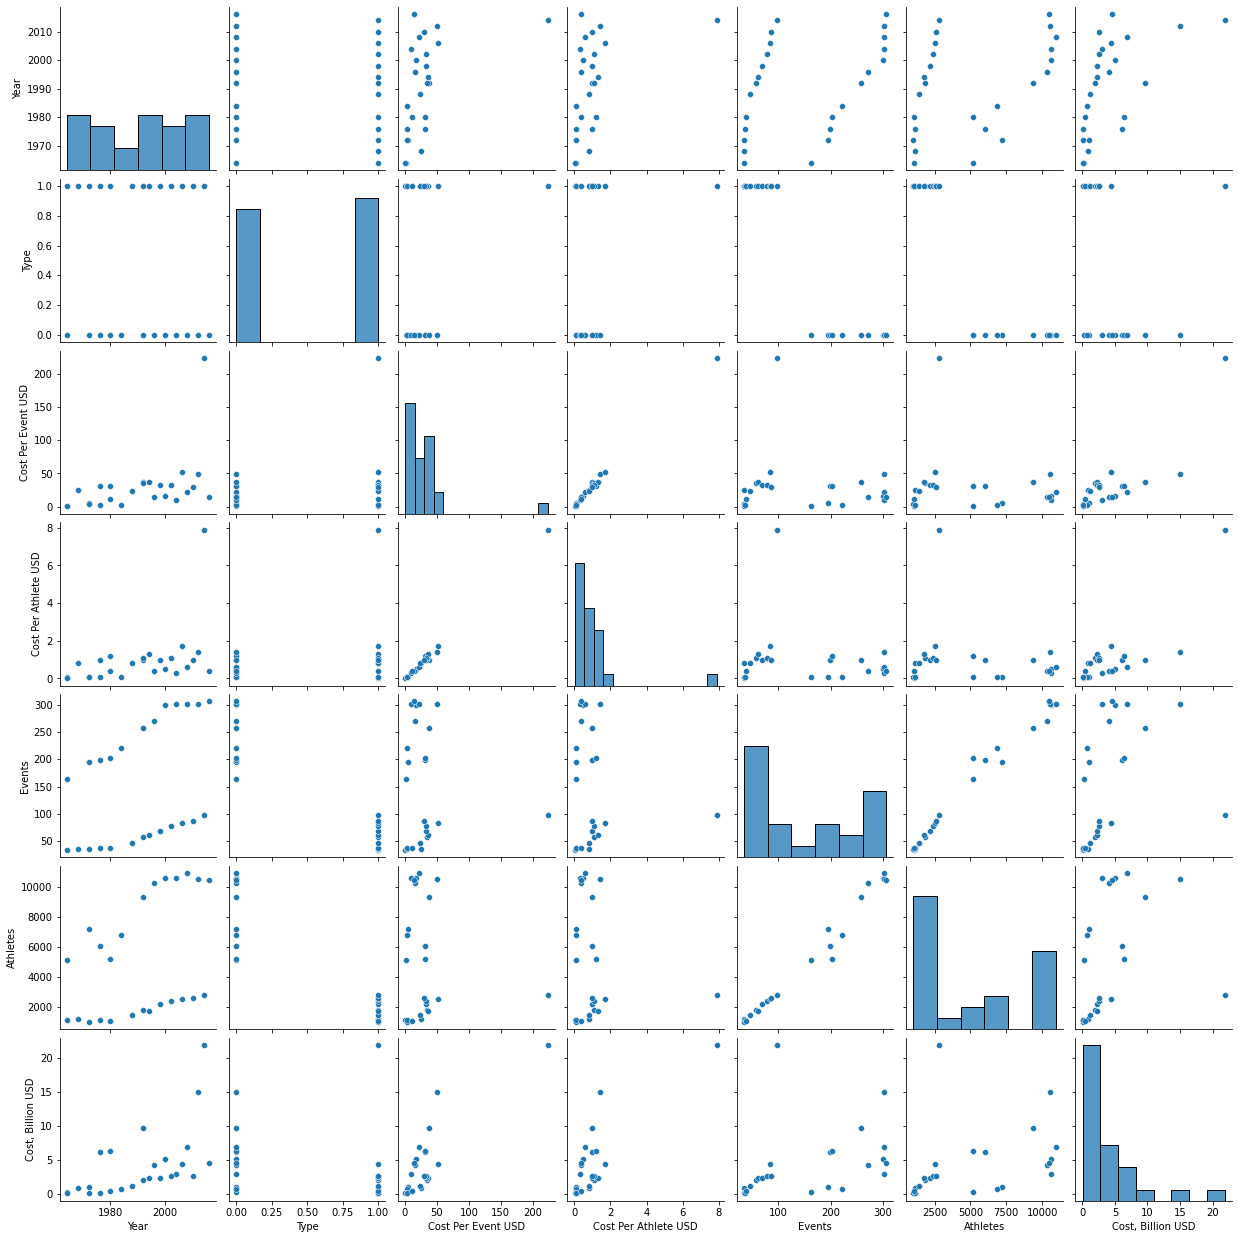

In [153]:
sns.pairplot(df_merged)

In [19]:
df_merged.drop(columns = ["Type"], inplace = True)

In [20]:
df_merged.dtypes

Year                      int64
Cost Per Event USD      float64
Cost Per Athlete USD    float64
Events                    int64
Athletes                  int64
Cost, Billion USD       float64
dtype: object

In [21]:
features = df_merged.drop(columns = ["Cost, Billion USD"])
cost = df_merged["Cost, Billion USD"]

In [22]:
normalizer = tf.keras.layers.Normalization(axis = -1)
normalizer.adapt(features)

In [23]:
model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(6, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(1)
])

model.compile(
    optimizer = "adam",
    loss = "mse",
    metrics = [tf.keras.metrics.RootMeanSquaredError()]
)

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 5)                11        
 n)                                                              
                                                                 
 dense (Dense)               (None, 6)                 36        
                                                                 
 dense_1 (Dense)             (None, 100)               700       
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 10,948
Trainable params: 10,937
Non-trainable params: 11
___________________________________________________

In [25]:
features.dtypes

Year                      int64
Cost Per Event USD      float64
Cost Per Athlete USD    float64
Events                    int64
Athletes                  int64
dtype: object

While generating the graph, the normalizer layer has to be removed from the model and an explicit *inpu_shape* needs to be provided. These are some of the features of the model as it needs to know the exact configurations for generating the graph.

In [26]:
from ann_visualizer.visualize import ann_viz
import graphviz

graph = ann_viz(model, title = "Olympic Model")

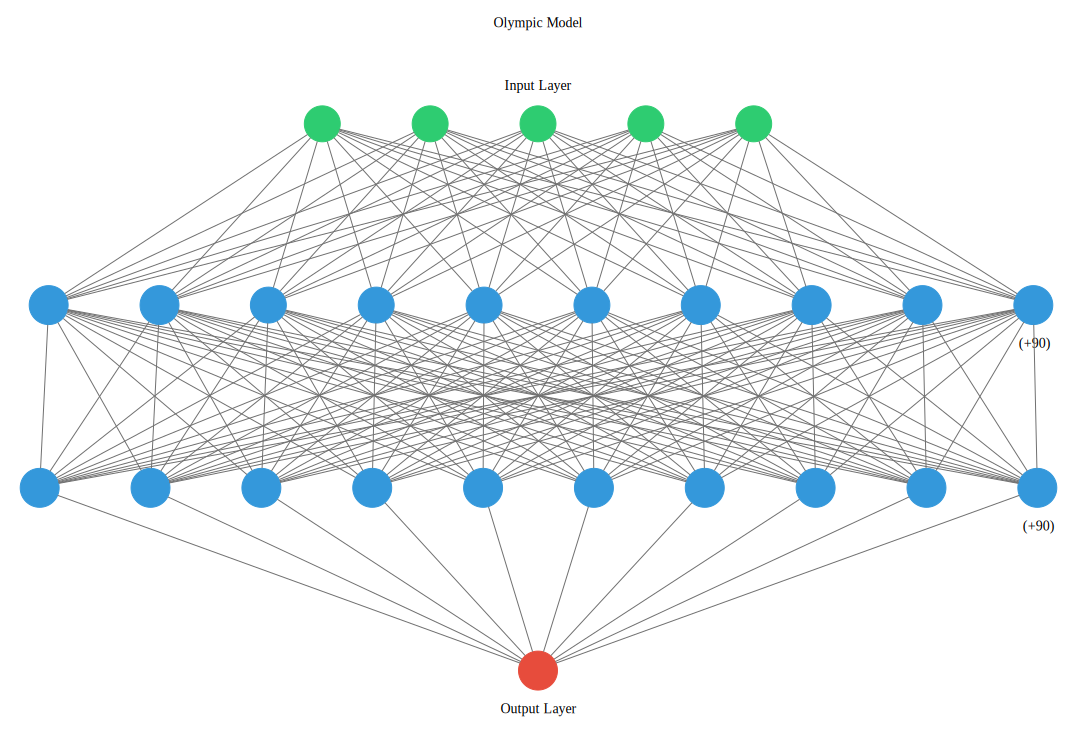

In [27]:
graph

In [161]:
history = model.fit(features, cost, epochs = 60, validation_split = 0.2)

Epoch 1/60
1/1 [==============================] - 0s 375ms/step - loss: 26.3635 - root_mean_squared_error: 5.1345 - val_loss: 103.0285 - val_root_mean_squared_error: 10.1503
Epoch 2/60
1/1 [==============================] - 0s 29ms/step - loss: 25.9875 - root_mean_squared_error: 5.0978 - val_loss: 100.4699 - val_root_mean_squared_error: 10.0235
Epoch 3/60
1/1 [==============================] - 0s 29ms/step - loss: 25.6223 - root_mean_squared_error: 5.0618 - val_loss: 97.9770 - val_root_mean_squared_error: 9.8983
Epoch 4/60
1/1 [==============================] - 0s 28ms/step - loss: 25.2768 - root_mean_squared_error: 5.0276 - val_loss: 95.6383 - val_root_mean_squared_error: 9.7795
Epoch 5/60
1/1 [==============================] - 0s 25ms/step - loss: 24.9435 - root_mean_squared_error: 4.9943 - val_loss: 93.3206 - val_root_mean_squared_error: 9.6603
Epoch 6/60
1/1 [==============================] - 0s 27ms/step - loss: 24.6188 - root_mean_squared_error: 4.9617 - val_loss: 91.0414 - val_r

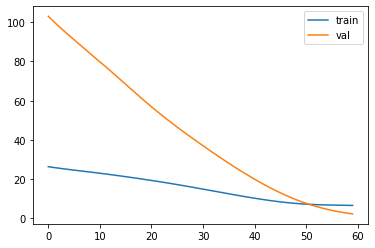

In [162]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.legend(["train", "val"])
plt.show()

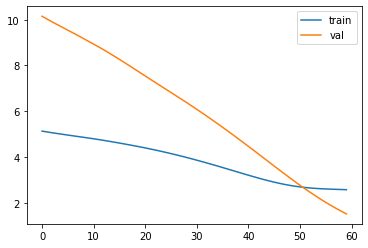

In [163]:
plt.plot(history.history["root_mean_squared_error"])
plt.plot(history.history["val_root_mean_squared_error"])
plt.legend(["train", "val"])
plt.show()